# Machine Learning Lab 1

## Assignment 3 (Deadline : 29/10/2020 11:59PM)

Total Points : 100

In [1]:
import numpy as np
np.random.seed(42)  # setting random seed for reproducibility

### 1. Digit Classification : 8 vs others (40 points)

In [2]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import binary

In [3]:
# The digits data can be loaded as follows :
from sklearn.datasets import load_digits
D = load_digits()
X, y = D["data"], D["target"]

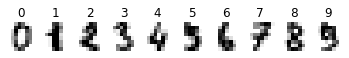

In [4]:
# Plot a few digits to get a sense of how the data looks like

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap= binary, interpolation="nearest")
    plt.axis("off")
    plt.title(y[i])

In [5]:
# Create a 2-class classification problem (digit 8 versus other digits)
# 20% for testing and rest for training

data_i = np.copy(X)
data_o = np.copy(y)

for i in range(len(data_o)):
    if (data_o[i]==8):
        data_o[i]=1
    else:
        data_o[i]=0

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_i, data_o, random_state=42,test_size = 0.2 ,stratify=data_o)

In [7]:
# Train a logistic regression model with no regularisation for the problem and obtain the cross validation accuracies

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty="none", random_state=42, max_iter=8000, solver="saga")
lr.fit(X_train, y_train)

LogisticRegression(max_iter=8000, penalty='none', random_state=42,
                   solver='saga')

In [8]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr, X_train, y_train, cv=4, scoring="accuracy")

array([0.96111111, 0.94986072, 0.94986072, 0.94986072])

In [9]:
# Predict values for the test set using the model obtained above 
lr_predict = lr.predict(X_test)

In [10]:
# Obtain all the different performance metrics for the model on the test set

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr_predict)

array([[321,   4],
       [ 11,  24]])

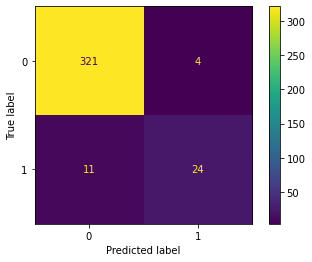

In [11]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test)

In [17]:
# Change the hyperparameters of the model and see what effect it has on the model
# Find the hyperparameters which maximises the model performance. Choose the right performance metric to evaluate the model

#l2 penalty

from sklearn.linear_model import LogisticRegressionCV
#c = [0.0001,0.001,0.01,0.1,1,100,1000] -> found 0.01 to be the best
#c = [0.005,0.009,0.01,0.02,0.05]-> best 0.005
#c = [0.002,0.003,0.004,0.005] -> best 0.003
c = np.linspace(0.002,0.006,50)
#c=[0.004,0.0784]
lr_cv_l2 = LogisticRegressionCV(Cs=c, random_state=42,max_iter=8000, solver='saga', penalty='l2')
lr_cv_l2.fit(X_train,y_train)

LogisticRegressionCV(Cs=array([0.002     , 0.00208163, 0.00216327, 0.0022449 , 0.00232653,
       0.00240816, 0.0024898 , 0.00257143, 0.00265306, 0.00273469,
       0.00281633, 0.00289796, 0.00297959, 0.00306122, 0.00314286,
       0.00322449, 0.00330612, 0.00338776, 0.00346939, 0.00355102,
       0.00363265, 0.00371429, 0.00379592, 0.00387755, 0.00395918,
       0.00404082, 0.00412245, 0.00420408, 0.00428571, 0.00436735,
       0.00444898, 0.00453061, 0.00461224, 0.00469388, 0.00477551,
       0.00485714, 0.00493878, 0.00502041, 0.00510204, 0.00518367,
       0.00526531, 0.00534694, 0.00542857, 0.0055102 , 0.00559184,
       0.00567347, 0.0057551 , 0.00583673, 0.00591837, 0.006     ]),
                     max_iter=8000, random_state=42, solver='saga')

In [18]:
lr_cv_l2.C_

array([0.00387755])

In [19]:
lr_cv_l2.score(X_train,y_train)

0.9665970772442589

### l1 penalty

In [47]:
from sklearn.linear_model import LogisticRegressionCV
#c = [0.0001,0.001,0.01,0.1,1,100,1000] #-> found 0.1 to be the best
#c=[0.008,0.009,0.1,0.2,0.3,0.4,0.5] #-> best 0.1


c = np.linspace(0.5,0.9,50)

#c = np.linspace(0.8,2,100)

#c=[0.004,0.0784]
lr_cv_l1 = LogisticRegressionCV(Cs=c, random_state=42,max_iter=8000, solver='saga', penalty='l1')
lr_cv_l1.fit(X_train,y_train)

LogisticRegressionCV(Cs=array([0.5       , 0.50816327, 0.51632653, 0.5244898 , 0.53265306,
       0.54081633, 0.54897959, 0.55714286, 0.56530612, 0.57346939,
       0.58163265, 0.58979592, 0.59795918, 0.60612245, 0.61428571,
       0.62244898, 0.63061224, 0.63877551, 0.64693878, 0.65510204,
       0.66326531, 0.67142857, 0.67959184, 0.6877551 , 0.69591837,
       0.70408163, 0.7122449 , 0.72040816, 0.72857143, 0.73673469,
       0.74489796, 0.75306122, 0.76122449, 0.76938776, 0.77755102,
       0.78571429, 0.79387755, 0.80204082, 0.81020408, 0.81836735,
       0.82653061, 0.83469388, 0.84285714, 0.85102041, 0.85918367,
       0.86734694, 0.8755102 , 0.88367347, 0.89183673, 0.9       ]),
                     max_iter=8000, penalty='l1', random_state=42,
                     solver='saga')

In [48]:
lr_cv_l1.C_

array([0.83469388])

### elastic

In [31]:
#from sklearn.linear_model import LogisticRegressionCV
c = np.linspace(0.001, 1, 10)
ratios=[1, 0.9, 0.5, 0.3, 0.1]
lr_cv_elastic = LogisticRegressionCV(Cs=c, random_state=42,max_iter=8000, solver='saga', penalty='elasticnet',l1_ratios=ratios)
lr_cv_elastic.fit(X_train,y_train)

LogisticRegressionCV(Cs=array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]),
                     l1_ratios=[1, 0.9, 0.5, 0.3, 0.1], max_iter=8000,
                     penalty='elasticnet', random_state=42, solver='saga')

In [32]:
lr_cv_elastic.C_

array([0.112])

In [33]:
lr_cv_elastic.l1_ratio_

array([0.3])

## f1_score is used to compare the different penalties

In [49]:
from sklearn.metrics import f1_score

print("l2-", f1_score(lr_cv_l2.predict(X_test),y_test))
print("l1-", f1_score(lr_cv_l1.predict(X_test),y_test))
print("elastic-", f1_score(lr_cv_elastic.predict(X_test),y_test))

l2- 0.7719298245614035
l1- 0.8064516129032259
elastic- 0.7741935483870968


In [50]:
print("The best result is given by L1 model with c = ",lr_cv_l1.C_)

The best result is given by L1 model with c =  [0.83469388]


# 2. California Housing Prices (60 points)

In this problem, we will take the same California Housing prices dataset that was shown in the last lab class to do a binary classification of whether the median house value for a given locality is high or low .

In [3]:
# Get the data from the website to the local directory

import os
import tarfile
from six.moves import urllib

source_path = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
local_path = os.path.join("datasets", "housing")

os.makedirs(local_path, exist_ok=True)
tgz_path = os.path.join(local_path, "housing.tgz")

urllib.request.urlretrieve(source_path, tgz_path)
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=local_path)
housing_tgz.close()

In [4]:
# Read the data into a dataframe
import pandas as pd

data = pd.read_csv('./datasets/housing/housing.csv')

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
# Explore the data to understand it better


#import seaborn as sns

#sns.pairplot(data)

In [8]:
#sns.heatmap(data.corr())

In [9]:
#data['median_house_value'].hist(bins=100)

In [10]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
#Replace NAN value with median
data['total_bedrooms'].fillna(data['total_bedrooms'].median,inplace=True)
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [12]:
# Convert the data to suit a binary classification of High Price vs Low Price for the median_house_value column
# Assume that anything >= $200,000 is high price with output value 1 and anything less than that is low price with output value 0.

data['median_house_value']=data['median_house_value'].apply(lambda x:0 if x<200000 else 1)

In [13]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129,322.0,126.0,8.3252,1,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106,2401.0,1138.0,8.3014,1,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190,496.0,177.0,7.2574,1,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235,558.0,219.0,5.6431,1,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280,565.0,259.0,3.8462,1,NEAR BAY


In [14]:
#sns.pairplot(data)

In [15]:
# Use stratified sampling to create an 80-20 train-test split

'''y = np.array(data['median_house_value'])
data.drop(['median_house_value'],axis=1,inplace=True)'''

"y = np.array(data['median_house_value'])\ndata.drop(['median_house_value'],axis=1,inplace=True)"

In [16]:
## pd.value_counts(data.ocean_proximity)
ocean_proximity = pd.get_dummies(data.ocean_proximity)
X2 = pd.concat([data,ocean_proximity], axis = 'columns')
X2.drop(['ocean_proximity'], axis='columns', inplace = True)
X2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [17]:
y = np.array(X2['median_house_value'])
X2.drop(['median_house_value'],axis=1,inplace=True)
X2 = np.array(X2)

In [19]:
#Splitting data and stratification
from sklearn.model_selection import train_test_split
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X2, y, random_state=42,test_size = 0.2 ,stratify=y)

In [22]:
X2.shape

(20640, 13)

In [184]:
# Find the best Logistic Regression model that can solve this problem


In [24]:
from sklearn.linear_model import LogisticRegression
cs= [0.001,0.1,1,10,100,1000]
lr_l1_house = LogisticRegression(random_state=42,max_iter=10000,solver='saga')
lr_l1_house.fit(X_train_h,y_train_h)
#cross_val_score(classifier,train_input,train_output,cv=5,scoring = 'accuracy')
#lr_l1_house.C_

TypeError: float() argument must be a string or a number, not 'method'